**PILAR ARIAS VAZQUEZ, ÁLVARO GARCÍA CID, YEDRA MARTÍN OLMOS, AMAYA SARASA COLINA**

**<GRUPO 7>**

# IMPORTAMOS LIBRERÍAS Y DATOS

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.9.2


Nos aseguramos del tamaño de los datos de entrada y de las etiquetas

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
assert train_images.shape == (60000,28,28)
assert test_images.shape == (10000,28,28)
assert train_labels.shape == (60000,)
assert test_labels.shape == (10000,)

4422102/4422102 [==============================] - 0s 0us/step


Vamos a dibujar la imagen de entrenamiento 1000 para comprobar que las imágenes descargadas son las correctas

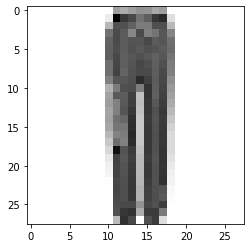

In [3]:
digit = train_images[1000]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Procedemos a normalizar las imágenes tanto de test como de entrenamiento y redefinimos su forma

In [4]:
train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32') / 255
train_labels = train_labels.reshape((60000,1))
test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32') / 255
test_labels = test_labels.reshape((10000,1))

In [5]:
print (train_images.shape)
print (train_labels.shape)

(60000, 28, 28, 1)
(60000, 1)


Vamos a comprobar si los datos tanto de test como de entrenamiento están bien distribuidos

In [6]:
cont=0
cont1=0
cont2=0
cont3=0
cont4=0
cont5=0
cont6=0
cont7=0
cont8=0
cont9=0
for i in train_labels:
  if i==0:
    cont=cont+1
  elif i==1:
    cont1=cont1+1
  elif i==2:
    cont2=cont2+1
  elif i==3:
    cont3=cont3+1
  elif i==4:
    cont4=cont4+1
  elif i==5:
    cont5=cont5+1
  elif i==6:
    cont6=cont6+1
  elif i==7:
    cont7=cont7+1
  elif i==8:
    cont8=cont8+1
  elif i==9:
    cont9=cont9+1
print(cont,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9)

6000 6000 6000 6000 6000 6000 6000 6000 6000 6000


In [7]:
cont=0
cont1=0
cont2=0
cont3=0
cont4=0
cont5=0
cont6=0
cont7=0
cont8=0
cont9=0
for i in test_labels:
  if i==0:
    cont=cont+1
  elif i==1:
    cont1=cont1+1
  elif i==2:
    cont2=cont2+1
  elif i==3:
    cont3=cont3+1
  elif i==4:
    cont4=cont4+1
  elif i==5:
    cont5=cont5+1
  elif i==6:
    cont6=cont6+1
  elif i==7:
    cont7=cont7+1
  elif i==8:
    cont8=cont8+1
  elif i==9:
    cont9=cont9+1
print(cont,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9)

1000 1000 1000 1000 1000 1000 1000 1000 1000 1000


Vemos que en ambos casos tenemos que el 10% del conjunto total de etiquetas se corresponde a cada una de las diferentes categorias que hay en el conjunto de datos, es decir, están bien distribuidos.

# CASOS

## CASO 1.1

Creamos el modelo, será un modelo secuencial formado por dos capas convolucionales, dos capas de MaxPooling, una capa flatten y una capa densa final con función de activación softmax que contiene 10 neuronas, debido a las 10 clases que hay. 

In [8]:
model = Sequential()
model.add(Conv2D(32, (5, 5), strides=(1, 1), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (5, 5), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 10)                1

Compilamos el modelo utilizando los hiperparámetros estipulados.

In [9]:
model.compile(loss=sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

Entrenamos el modelo utilizando un validation split de 0.2

In [10]:
history1=model.fit(train_images, train_labels,
          batch_size=50,
          epochs=5,
          verbose=1,
          validation_split=0.2)

Epoch 1/5
960/960 [==============================] - 12s 4ms/step - loss: 0.9977 - accuracy: 0.6521 - val_loss: 0.6767 - val_accuracy: 0.7403
Epoch 2/5
960/960 [==============================] - 3s 3ms/step - loss: 0.6103 - accuracy: 0.7796 - val_loss: 0.5625 - val_accuracy: 0.7973
Epoch 3/5
960/960 [==============================] - 3s 3ms/step - loss: 0.5271 - accuracy: 0.8108 - val_loss: 0.5247 - val_accuracy: 0.8151
Epoch 4/5
960/960 [==============================] - 3s 3ms/step - loss: 0.4803 - accuracy: 0.8294 - val_loss: 0.4689 - val_accuracy: 0.8330
Epoch 5/5
960/960 [==============================] - 3s 3ms/step - loss: 0.4483 - accuracy: 0.8418 - val_loss: 0.4648 - val_accuracy: 0.8329


In [11]:
def pinta_precision_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  plt.clf()   # Limpia la figura
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [12]:
def pinta_perdida_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  epochs = range(1, len(acc) + 1)
  # "bo" es para "punto azun"
  plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
  # "b" es para "linea continua azul"
  plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

Por último dibujamos las gráficas de perdida y precisión para hacer un estudio mejor del modelo.

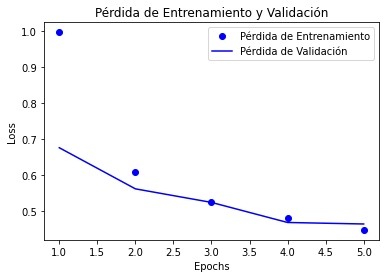

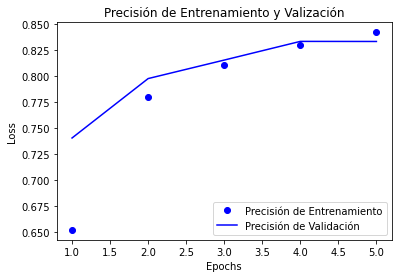

In [13]:
pinta_perdida_entrenamiento_validacion(history1)
pinta_precision_entrenamiento_validacion(history1)

## CASO 1.2

Este caso es igual que el anterior, salvo que a la hora de entrenar el modelo, en vez de poner 5 épocas, utilizará 25. 

In [14]:
model12 = Sequential()
model12.add(Conv2D(32, (5, 5), strides=(1, 1), activation='relu', input_shape=(28,28,1)))
model12.add(MaxPooling2D((2, 2)))

model12.add(Conv2D(64, (5, 5), strides=(1, 1), activation='relu'))
model12.add(MaxPooling2D((2, 2)))

model12.add(Flatten())
model12.add(Dense(10, activation='softmax'))
model12.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [15]:
model12.compile(loss=sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

In [16]:
history12=model12.fit(train_images, train_labels,
          batch_size=50,
          epochs=25,
          verbose=1,
          validation_split=0.2)

Epoch 1/25
960/960 [==============================] - 4s 4ms/step - loss: 1.0215 - accuracy: 0.6477 - val_loss: 0.6507 - val_accuracy: 0.7611
Epoch 2/25
960/960 [==============================] - 3s 3ms/step - loss: 0.6010 - accuracy: 0.7806 - val_loss: 0.5399 - val_accuracy: 0.8010
Epoch 3/25
960/960 [==============================] - 3s 4ms/step - loss: 0.5243 - accuracy: 0.8116 - val_loss: 0.5475 - val_accuracy: 0.8019
Epoch 4/25
960/960 [==============================] - 3s 3ms/step - loss: 0.4774 - accuracy: 0.8303 - val_loss: 0.5036 - val_accuracy: 0.8135
Epoch 5/25
960/960 [==============================] - 3s 3ms/step - loss: 0.4491 - accuracy: 0.8403 - val_loss: 0.4396 - val_accuracy: 0.8475
Epoch 6/25
960/960 [==============================] - 3s 3ms/step - loss: 0.4270 - accuracy: 0.8497 - val_loss: 0.4269 - val_accuracy: 0.8507
Epoch 7/25
960/960 [==============================] - 3s 3ms/step - loss: 0.4085 - accuracy: 0.8550 - val_loss: 0.4166 - val_accuracy: 0.8553
Epoch 

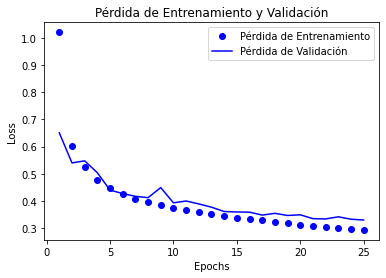

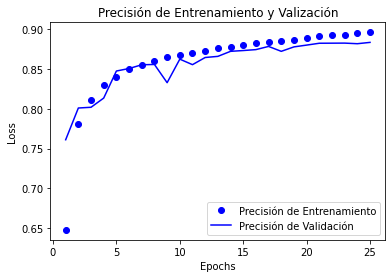

In [17]:
pinta_perdida_entrenamiento_validacion(history12)
pinta_precision_entrenamiento_validacion(history12)

## CASO 1.3

Este caso es igual que el caso 1.1, salvo que en vez de poner la función de activación relu, encontraremos 'tanh' en ambas capas convolucionales.

In [18]:
model13 = Sequential()
model13.add(Conv2D(32, (5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1)))
model13.add(MaxPooling2D((2, 2)))

model13.add(Conv2D(64, (5, 5), strides=(1, 1), activation='tanh'))
model13.add(MaxPooling2D((2, 2)))

model13.add(Flatten())
model13.add(Dense(10, activation='softmax'))
model13.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [19]:
model13.compile(loss=sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

In [20]:
history13=model13.fit(train_images, train_labels,
          batch_size=50,
          epochs=5,
          verbose=1,
          validation_split=0.2)

Epoch 1/5
960/960 [==============================] - 4s 4ms/step - loss: 0.9663 - accuracy: 0.6805 - val_loss: 0.6370 - val_accuracy: 0.7622
Epoch 2/5
960/960 [==============================] - 4s 4ms/step - loss: 0.5856 - accuracy: 0.7848 - val_loss: 0.5379 - val_accuracy: 0.8052
Epoch 3/5
960/960 [==============================] - 3s 4ms/step - loss: 0.5110 - accuracy: 0.8163 - val_loss: 0.4855 - val_accuracy: 0.8237
Epoch 4/5
960/960 [==============================] - 3s 3ms/step - loss: 0.4670 - accuracy: 0.8345 - val_loss: 0.4565 - val_accuracy: 0.8332
Epoch 5/5
960/960 [==============================] - 3s 3ms/step - loss: 0.4375 - accuracy: 0.8451 - val_loss: 0.4278 - val_accuracy: 0.8478


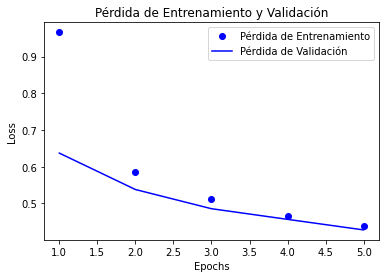

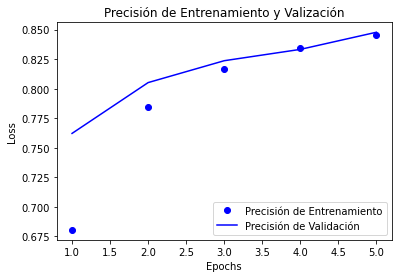

In [21]:
pinta_perdida_entrenamiento_validacion(history13)
pinta_precision_entrenamiento_validacion(history13)

Comparando con el caso 1.1, es decir, con la función de activación ReLU, se puede apreciar que en la primera época, se alcanza más precisión y menos pérdida, que con la función de activación tanh (caso 1.3). ReLU tiende a tener más función de pérdida a lo largo de las 5 épocas, sin embargo, a partir de la primera época, se aprecia más precisión. 

Por lo que al final de las 5 épocas, encontramos menos pérdida en tanh, pero más precisión en ReLU.
Efectivamente, esto se puede comprobar gracias a las gráficas que se han realizado anteriormente en cada caso. 

Comparando enconjunto podemos ver como el caso 1.2 en el que se realiza un mayor número de épocas, no se produce sobreentrenamiento sino que obtenemos unos valores mejores de precisión y pérdida que en los casos 1.1 y 1.3

Por lo tanto para este tipo de modelo es mejor emplear un número mayor de 5 épocas para entrenar.




## CASO 2.1

En este caso 2, encontramos el doble de filtros que en el caso anterior, y un tamaño de ventana de 7x7.
Las funciones de activación que se van a usar son relu.

In [22]:
model2 = Sequential()
model2.add(Conv2D(64, (7, 7), strides=(1, 1), activation='relu', padding='same', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(128, (3, 3), strides=(1, 1), activation='relu', padding='same'))
model2.add(MaxPooling2D((2, 2)))

model2.add(Flatten())
model2.add(Dense(65,activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_3 (Dense)             (None, 65)               

Compilamos el modelo con el optimizador 'sgd'.

In [23]:
model2.compile(loss=sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

In [24]:
history2=model2.fit(train_images, train_labels,
          batch_size=50,
          epochs=5,
          verbose=1,
          validation_split=0.2)

Epoch 1/5
960/960 [==============================] - 5s 5ms/step - loss: 0.9275 - accuracy: 0.6734 - val_loss: 0.6253 - val_accuracy: 0.7740
Epoch 2/5
960/960 [==============================] - 5s 5ms/step - loss: 0.5876 - accuracy: 0.7847 - val_loss: 0.5246 - val_accuracy: 0.8119
Epoch 3/5
960/960 [==============================] - 4s 5ms/step - loss: 0.5084 - accuracy: 0.8160 - val_loss: 0.4865 - val_accuracy: 0.8242
Epoch 4/5
960/960 [==============================] - 4s 5ms/step - loss: 0.4562 - accuracy: 0.8367 - val_loss: 0.4331 - val_accuracy: 0.8478
Epoch 5/5
960/960 [==============================] - 5s 5ms/step - loss: 0.4219 - accuracy: 0.8504 - val_loss: 0.4197 - val_accuracy: 0.8491


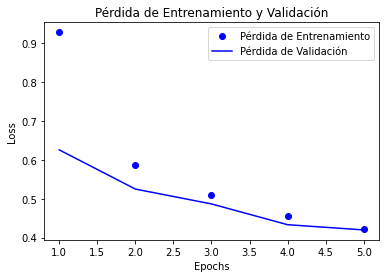

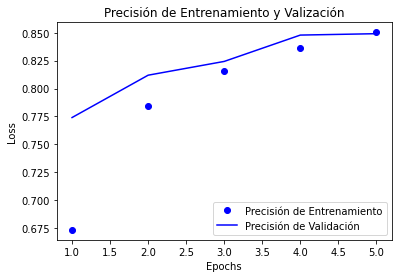

In [25]:
pinta_perdida_entrenamiento_validacion(history2)
pinta_precision_entrenamiento_validacion(history2)

## CASO 2.2

Empleamos el mismo modelo que en el caso 2.1 con la diferencia de que en este caso emplearemos 25 épocas para el entrenamiento.

In [26]:
model22 = Sequential()
model22.add(Conv2D(64, (7, 7), strides=(1, 1), activation='relu', padding='same', input_shape=(28, 28, 1)))
model22.add(MaxPooling2D((2, 2)))

model22.add(Conv2D(128, (3, 3), strides=(1, 1), activation='relu', padding='same'))
model22.add(MaxPooling2D((2, 2)))

model22.add(Flatten())
model22.add(Dense(65,activation='relu'))
model22.add(Dense(10, activation='softmax'))
model22.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 6272)              0         
                                                                 
 dense_5 (Dense)             (None, 65)               

In [27]:
model22.compile(loss=sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

In [28]:
history22=model22.fit(train_images, train_labels,
          batch_size=50,
          epochs=25,
          verbose=1,
          validation_split=0.2)

Epoch 1/25
960/960 [==============================] - 5s 5ms/step - loss: 1.0041 - accuracy: 0.6470 - val_loss: 0.6248 - val_accuracy: 0.7801
Epoch 2/25
960/960 [==============================] - 4s 5ms/step - loss: 0.5945 - accuracy: 0.7817 - val_loss: 0.5631 - val_accuracy: 0.7837
Epoch 3/25
960/960 [==============================] - 4s 5ms/step - loss: 0.5143 - accuracy: 0.8119 - val_loss: 0.4723 - val_accuracy: 0.8315
Epoch 4/25
960/960 [==============================] - 4s 5ms/step - loss: 0.4593 - accuracy: 0.8353 - val_loss: 0.4622 - val_accuracy: 0.8326
Epoch 5/25
960/960 [==============================] - 5s 5ms/step - loss: 0.4246 - accuracy: 0.8480 - val_loss: 0.4243 - val_accuracy: 0.8462
Epoch 6/25
960/960 [==============================] - 4s 5ms/step - loss: 0.3991 - accuracy: 0.8575 - val_loss: 0.3967 - val_accuracy: 0.8592
Epoch 7/25
960/960 [==============================] - 5s 5ms/step - loss: 0.3809 - accuracy: 0.8629 - val_loss: 0.4108 - val_accuracy: 0.8526
Epoch 

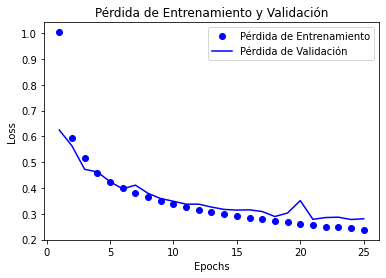

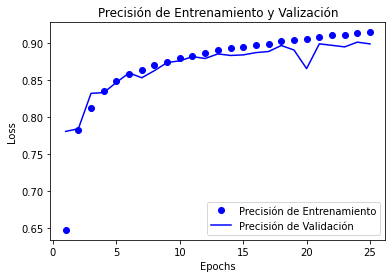

In [29]:
pinta_perdida_entrenamiento_validacion(history22)
pinta_precision_entrenamiento_validacion(history22)

Al igual que ocurría en el caso 1, en el caso 2 podemos comprobar que el modelo 2.2, en el cual empleamos 25 épocas para entrenar, no se sobre entrena por lo que obtenemos mejores datos de precisión y pérdida que en el caso 2.1

## CASO 3.1

Este modelo esta formado por dos capas convolucionales, dos capa de MaxPooling, una capa flatten y dos capas densas, la primera de ella con función de activación relu y la segunda de ellas con función de activación softmax.

In [30]:
model3 = Sequential()
model3.add(Conv2D(64, (7, 7), strides=(1, 1), activation='relu', padding='same', input_shape=(28,28,1)))
model3.add(MaxPooling2D((2, 2)))

model3.add(Conv2D(128, (3, 3), strides=(1, 1), activation='relu', padding='same'))
model3.add(MaxPooling2D((2, 2)))

model3.add(Flatten())
model3.add(Dense(65,activation='relu'))
model3.add(Dense(10, activation='softmax'))
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 6272)              0         
                                                                 
 dense_7 (Dense)             (None, 65)               

In [31]:
model3.compile(loss=sparse_categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])

In [32]:
history3=model3.fit(train_images, train_labels,
          batch_size=50,
          epochs=5,
          verbose=1,
          validation_split=0.2)

Epoch 1/5
960/960 [==============================] - 5s 5ms/step - loss: 0.4539 - accuracy: 0.8378 - val_loss: 0.3307 - val_accuracy: 0.8818
Epoch 2/5
960/960 [==============================] - 4s 5ms/step - loss: 0.2992 - accuracy: 0.8920 - val_loss: 0.2941 - val_accuracy: 0.8925
Epoch 3/5
960/960 [==============================] - 5s 5ms/step - loss: 0.2521 - accuracy: 0.9075 - val_loss: 0.2652 - val_accuracy: 0.9031
Epoch 4/5
960/960 [==============================] - 5s 5ms/step - loss: 0.2192 - accuracy: 0.9196 - val_loss: 0.2445 - val_accuracy: 0.9121
Epoch 5/5
960/960 [==============================] - 4s 5ms/step - loss: 0.1942 - accuracy: 0.9275 - val_loss: 0.2427 - val_accuracy: 0.9122


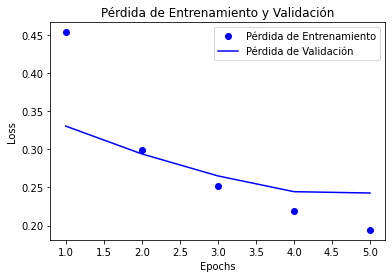

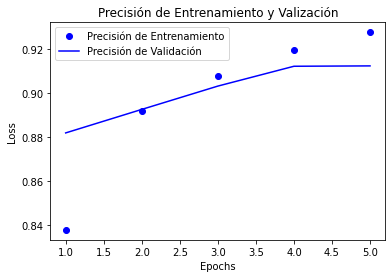

In [33]:
pinta_perdida_entrenamiento_validacion(history3)
pinta_precision_entrenamiento_validacion(history3)

## CASO 3.2

El modelo empleado en este caso es el mismo que el en caso 3.1, empleando 25 épocas en vez de 5 para realizar el entrenamiento.

In [34]:
model32 = Sequential()
model32.add(Conv2D(64, (7, 7), strides=(1, 1), activation='relu', padding='same', input_shape=(28,28,1)))
model32.add(MaxPooling2D((2, 2)))

model32.add(Conv2D(128, (3, 3), strides=(1, 1), activation='relu', padding='same'))
model32.add(MaxPooling2D((2, 2)))

model32.add(Flatten())
model32.add(Dense(65,activation='relu'))
model32.add(Dense(10, activation='softmax'))
model32.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 6272)              0         
                                                                 
 dense_9 (Dense)             (None, 65)               

In [35]:
model32.compile(loss=sparse_categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])

In [36]:
history32=model32.fit(train_images, train_labels,
          batch_size=50,
          epochs=25,
          verbose=1,
          validation_split=0.2)

Epoch 1/25
960/960 [==============================] - 5s 5ms/step - loss: 0.4602 - accuracy: 0.8344 - val_loss: 0.3311 - val_accuracy: 0.8817
Epoch 2/25
960/960 [==============================] - 4s 5ms/step - loss: 0.2972 - accuracy: 0.8935 - val_loss: 0.2781 - val_accuracy: 0.8999
Epoch 3/25
960/960 [==============================] - 5s 5ms/step - loss: 0.2537 - accuracy: 0.9058 - val_loss: 0.2593 - val_accuracy: 0.9062
Epoch 4/25
960/960 [==============================] - 5s 5ms/step - loss: 0.2225 - accuracy: 0.9189 - val_loss: 0.2527 - val_accuracy: 0.9067
Epoch 5/25
960/960 [==============================] - 5s 5ms/step - loss: 0.1958 - accuracy: 0.9287 - val_loss: 0.2366 - val_accuracy: 0.9124
Epoch 6/25
960/960 [==============================] - 5s 5ms/step - loss: 0.1752 - accuracy: 0.9361 - val_loss: 0.2384 - val_accuracy: 0.9108
Epoch 7/25
960/960 [==============================] - 4s 5ms/step - loss: 0.1538 - accuracy: 0.9436 - val_loss: 0.2534 - val_accuracy: 0.9097
Epoch 

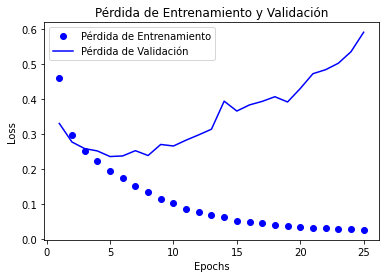

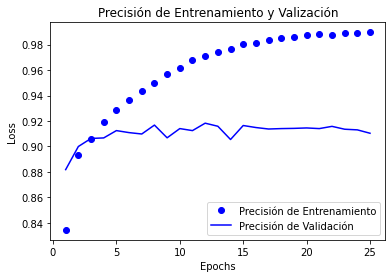

In [37]:
pinta_perdida_entrenamiento_validacion(history32)
pinta_precision_entrenamiento_validacion(history32)

En este caso podemos ver que el modelo más adecuado es el 3.1 ya que viendo el comportamiento del modelo 3.2 podemos apreciar que el modelo se sobre entrena cuando pasamos las 5 épocas

# ANÁLISIS MODEL.SUMMARY()


Se analizarán los 3 casos teniendo en cuenta que el stride que se utiliza es 1.

  ## CASO 1
  **1ª capa convolucional:**

  - Conv2d:

      (5x5 de matriz W + 1 del bias) x 32 filtros = *832 parámetros*

  - MaxPooling2D:

      0, no se hace uso de parámetros.

  **2ª capa convolucional**

  - Conv2D_1:

      (5x5 de matriz W x 32 filtros anteriores + 1 del bias) x 64 filtros = *51 264 parámetros*

  - MaxPooling2D_1:

      0, no se hace uso de parámetros.

  - Flatten

      0, no se hace uso de parámetros.
  - Dense

      El número de parámteros de la capa soft-max es 10 x 1024 + 10 = *10250 parámetros*

**Parámetros totales**

  *832* de la 1ª capa convolucional + *51264* de la 2ª capa convolucional + *10250* de la capa dense = *62,346* parámetros entrenables. 


  ## CASO 2
  La principal diferencia entre este caso 2 y el caso 1 es que el tamaño de las matrices se mantiene tras pasar por las capas Conv2d ya que introducimos el padding, que consiste en rellenar con 0 para matener el tamaño de la matriz.

  **1ª capa convolucional:**

  - Conv2d: 
    
      (7x7 de matriz W + 1 del bias) x 64 filtros = *3200 parámetros*

  - MaxPooling2D: 

      0, no se hace uso de parámetros.

  **2ª capa convolucional**

  - Conv2d: 

      (3x3 de matriz W x 64 filtros anteriores + 1 del bias) x 128 filtros = *73 856 parámetros.*

  - MaxPooling2D_1:

      0, no se hace uso de parámetros.

  - Flatten

      0, no se hace uso de parámetros.

  - Dense_1

      El número de parámetros de la capa ReLU es (6272 reuronas tras el flatten + 1 del bias) x 65 neuronas dela capa = *407745 parámetros*

  - Dense_2

      El número de parámetros de la capa soft-max es 10 x 65 + 10 = *660 parámetros.*



  **Parámetros totales**

  *3200* de la 1ª capa convolucional + *73856* de la 2ª capa convolucional + *407745* de la 1ª capa dense + 660 de la 2ª capa dense = *485461 parámetros.*


  ## CASO 3
  La principal diferencia entre este caso 3 y el caso 1 es que el tamaño de las matrices se mantiene tras pasar por las capas Conv2d ya que introducimos el padding, que consiste en rellenar con 0 para matener el tamaño de la matriz.

  **1ª capa convolucional:**

  - Conv2d: 
    
      (7x7 de matriz W + 1 del bias) x 64 filtros = *3200 parámetros*

  - MaxPooling2D: 

      0, no se hace uso de parámetros.

**2ª capa convolucional**

  - Conv2d: 

      (3x3 de matriz W x 64 filtros anteriores + 1 del bias) x 128 filtros = *73 856 parámetros.*

  - MaxPooling2D_1:

      0, no se hace uso de parámetros.

  - Flatten

      0, no se hace uso de parámetros.

  - Dense_1

      El número de parámetros de la capa ReLU es (6272 reuronas tras el flatten + 1 del bias) x 65 neuronas dela capa = *407745 parámetros*

  - Dense_2

      El número de parámetros de la capa soft-max es 10 x 65 + 10 = *660 parámetros.*

**Parámetros totales**

  *3200* de la 1ª capa convolucional + *73856* de la 2ª capa convolucional + *407745* de la 1ª capa dense + 660 de la 2ª capa dense = *485461 parámetros.*

# ANÁLISIS RESULTADOS

In [43]:
predictions = model.predict(test_images)
predictions2 = model2.predict(test_images)
predictions3 = model3.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [44]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

In [45]:
test_labels=test_labels.reshape(10000,)

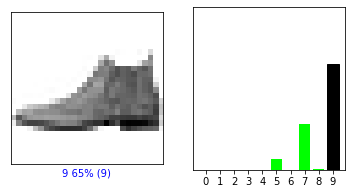

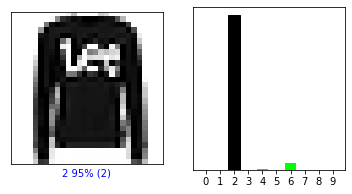

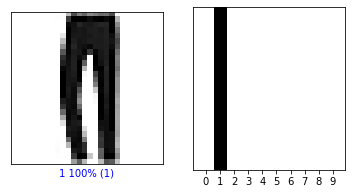

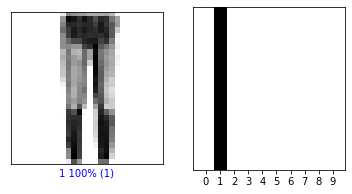

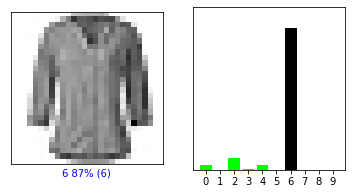

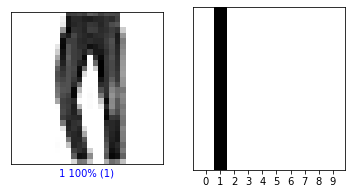

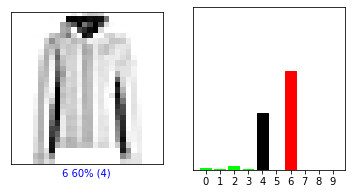

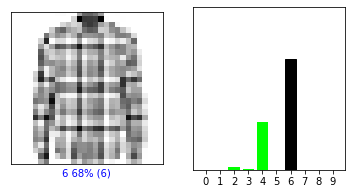

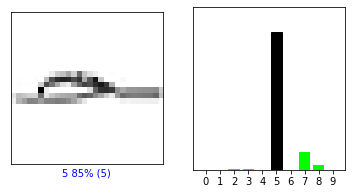

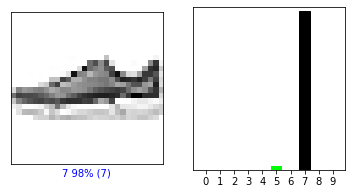

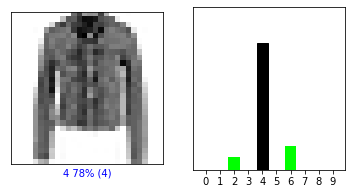

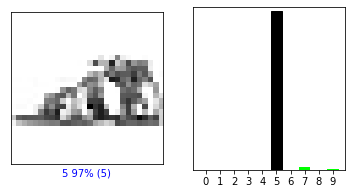

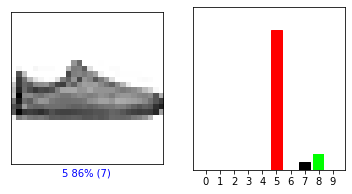

In [46]:
i = 0
for j in range (0,13):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(j, predictions[j], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(j, predictions[j], test_labels)
  plt.show()

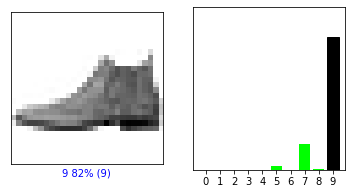

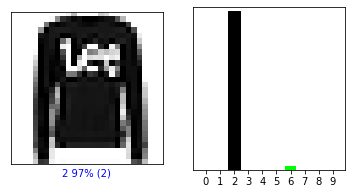

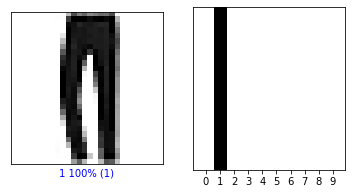

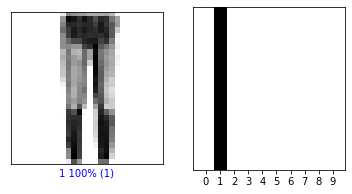

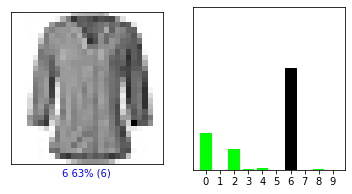

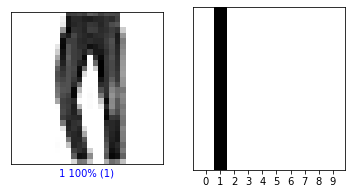

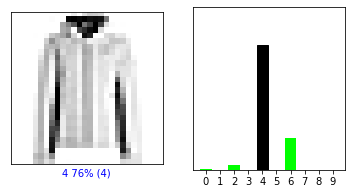

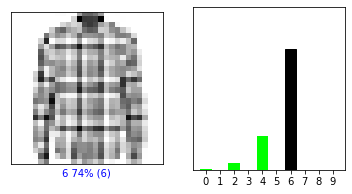

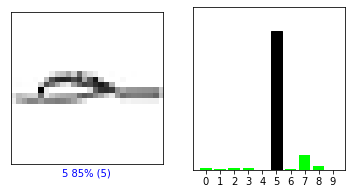

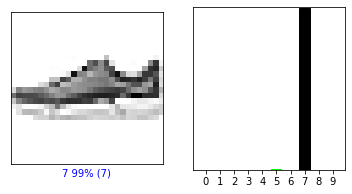

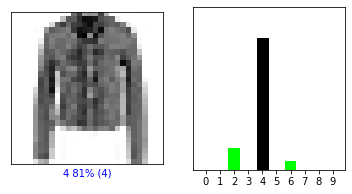

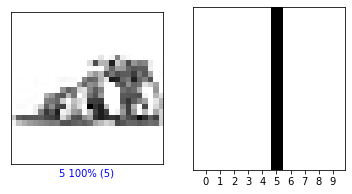

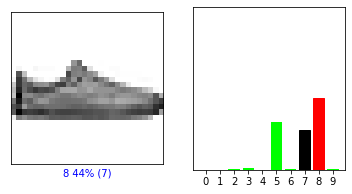

In [47]:
for j in range (0,13):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(j, predictions2[j], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(j, predictions2[j], test_labels)
  plt.show()

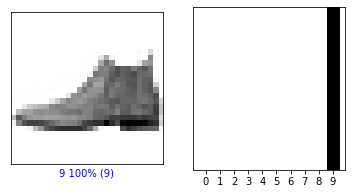

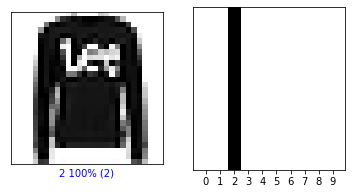

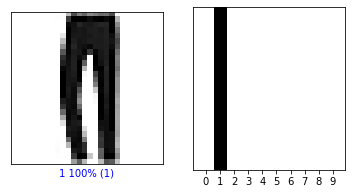

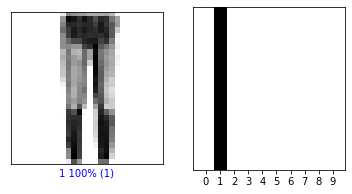

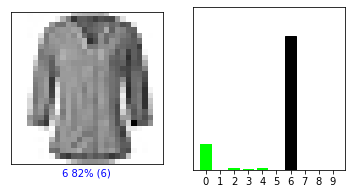

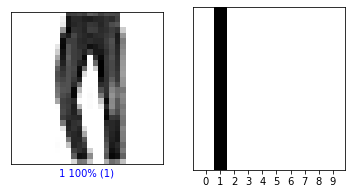

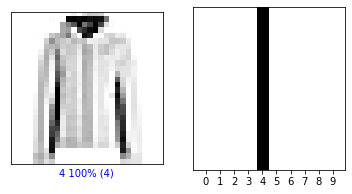

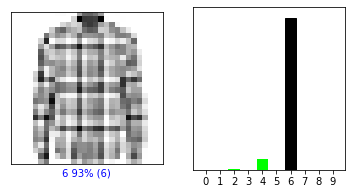

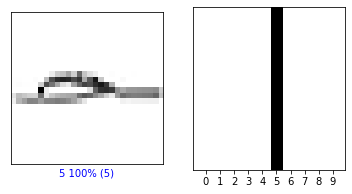

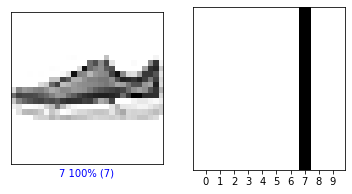

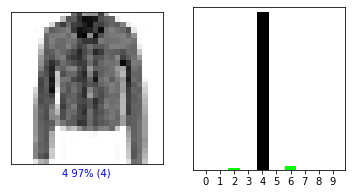

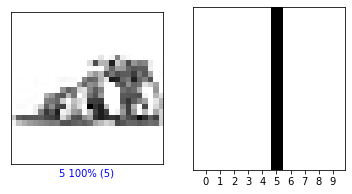

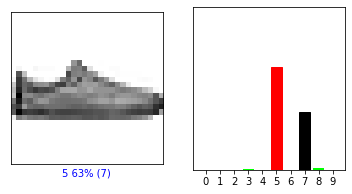

In [48]:
for j in range (0,13):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(j, predictions3[j], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(j, predictions3[j], test_labels)
  plt.show()

Observando la prediccion de los 3 modelos acerca de la imagen de test [5] correspondiente a un pantalón vemos como los 3 modelos se comportan de igual manera ya que todos predicen que la imagen se corresponde a un pantalón al 100%

En cuanto a las predicciones de las 14 imágenes en los 3 modelos podemos ver que el modelo que mejor predice las imágenes es el modelo número 3 ya que casi en su totalidad predice los resultados correctamente con porcentajes muy cercanos al 100%, mientras que los otros dos modelos predicen bien la mayoría de las imágenes pero de forma menos segura.

A pesar de esto se ve que la imagen de test [13] no la predice bien ninguno de los 3 modelos realizados.

In [49]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

In [50]:
from keras.utils.np_utils import to_categorical
one_hot_test_labels=to_categorical(test_labels)

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 1============================


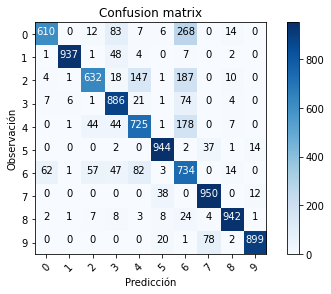

In [51]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(predictions, axis = 1) 
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(one_hot_test_labels, axis = 1) 
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 1============================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 2============================


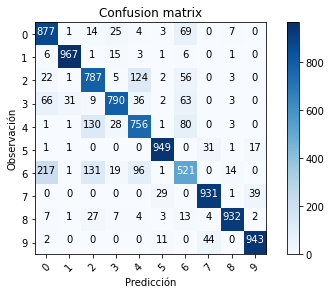

In [52]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(predictions2, axis = 1) 
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(one_hot_test_labels, axis = 1) 
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 2============================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 3============================


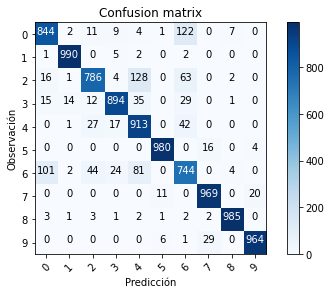

In [53]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(predictions3, axis = 1) 
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(one_hot_test_labels, axis = 1) 
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 3============================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

Observando las matrices de confusión de los distintos casos podemos ver que se verifica lo visto previamente y es que el modelo del caso 3 se confunde menos veces que los otros dos modelos a la hora de predecir las imágenes.

A pesar de esto, vemos como en los tres modelos el mayor número de predicciones erróneas se produce cuando la imagen pertenece a las etiquetas 2, 4 y 6 pertenecientes a jerseys, abrigos y camisas.

#COCEPTOS DE BATCH_NORMALIZATION Y DROPOUT

**Batch_normalization**

- Concepto 

    El "batch_normalization", como su nombre indica, normaliza los lotes de datos, de manera que la media de salida de cada lote de los datos estará alrededor del cero y desviación estándar cerca de 1. La media y la desviación estándar de cada variable se actualizan para cada minilote y se mantiene un promedio en ejecución.
    
    Sin embargo, no actúa igual que cuando lo hacíamos de manera "manual", puesto que normalizabamos los datos de entrenamiento y los de test por separado, para no contaminar los datos de test en función de los de entrenamiento. Sin embargo, esta función utiliza la media y la desviación estándar de los lotes de entrenamiento para normalizar la salida de los datos de test.  

    Esto implica que solo normalizará los datos de test cuando haya utilizado datos de entrenamiento con estadísticas similares.

    Como los datos de test están influidos por los de entrenamiento, la precisión será menor y nuestro modelo no será óptimo. 

- Aplicación al modelo 1

    Veamos que ocurre si empleamos el batch_normalization en el modelo 1:


Antes de crear la red, volvemos a importar los datos porque los anteriores ya están normalizados.

In [54]:
(train_imagesBN, train_labelsBN), (test_imagesBN, test_labelsBN) = tf.keras.datasets.fashion_mnist.load_data()
assert train_imagesBN.shape == (60000,28,28)
assert test_imagesBN.shape == (10000,28,28)
assert train_labelsBN.shape == (60000,)
assert test_labelsBN.shape == (10000,)

Importamos la librería.

In [55]:
from keras.layers import BatchNormalization

Creamos la red como anteriormente y añadimos la capa de normalización.

In [56]:
modelBN = Sequential()
modelBN.add(Conv2D(32, (5, 5), strides=(1, 1), activation='relu', input_shape=(28,28,1)))
modelBN.add(MaxPooling2D((2, 2)))

modelBN.add(Conv2D(64, (5, 5), strides=(1, 1), activation='relu'))
modelBN.add(MaxPooling2D((2, 2)))

modelBN.add(Flatten())
modelBN.add(BatchNormalization())
modelBN.add(Dense(10, activation='softmax'))
modelBN.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 1024)              0         
                                                                 
 batch_normalization (BatchN  (None, 1024)            

In [57]:
modelBN.compile(loss=sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

In [58]:
historyBN=modelBN.fit(train_imagesBN, train_labelsBN,
          batch_size=50,
          epochs=5,
          verbose=1,
          validation_split=0.2)

Epoch 1/5
960/960 [==============================] - 4s 4ms/step - loss: 0.4973 - accuracy: 0.8256 - val_loss: 0.4075 - val_accuracy: 0.8524
Epoch 2/5
960/960 [==============================] - 3s 4ms/step - loss: 0.3592 - accuracy: 0.8738 - val_loss: 0.3804 - val_accuracy: 0.8621
Epoch 3/5
960/960 [==============================] - 3s 4ms/step - loss: 0.3286 - accuracy: 0.8846 - val_loss: 0.3399 - val_accuracy: 0.8792
Epoch 4/5
960/960 [==============================] - 4s 4ms/step - loss: 0.2913 - accuracy: 0.8974 - val_loss: 0.3379 - val_accuracy: 0.8788
Epoch 5/5
960/960 [==============================] - 4s 4ms/step - loss: 0.2763 - accuracy: 0.9040 - val_loss: 0.3033 - val_accuracy: 0.8935


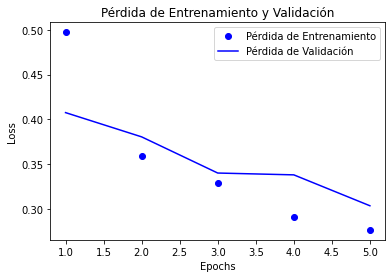

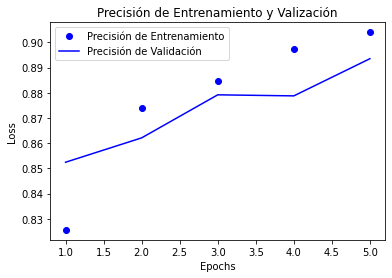

In [59]:
pinta_perdida_entrenamiento_validacion(historyBN)
pinta_precision_entrenamiento_validacion(historyBN)

Vemos que la precisión es del 89,61% frente al 85,20% del caso 1, bastante más precisa. 

**Dropout**

- Concepto 

    Cada cierto numero de datos introduce uno de ellos con valor 0, siendo su aportación nula y en la cual los pesos no varían tras su paso. De esta manera, el dropout permite que los pesos no se ajusten demasiado, y por lo tanto evitar el sobreajuste que empeore el modelo. 

    El hecho de que neuronas al azar no intervengan durante el entrenamiento implica que otras neuronas deben actuar para las predicciones de las neuronas que el Dropout ha eliminado. Se cree que esto da lugar a que la red aprenda múltiples representaciones internas independientes.
    
    La consecuencia es que la red pierde sensiblidad a los pesos de las neuronas, por lo que la red obtiene una generalización mejor y la probablidad del sobreentrenamiento es menor.

- Aplicación al modelo 1

    Veamos que ocurre si empleamos el dropout en el modelo 1:


A diferencia del bacth_normalization, nos sirven los datos importados al principio de la práctica, por lo que nos ahorramos el volver a importamos. 

Importamos la librería y creamos la red de neuronas:

In [60]:
from keras.layers import Dropout

 Elegimos una tasa de dropout del 50 %, lo que significa que una de cada dos entradas se excluirá al azar de cada ciclo de actualización.

In [61]:
modelD = Sequential()
modelD.add(Conv2D(32, (5, 5), strides=(1, 1), activation='relu', input_shape=(28,28,1)))
modelD.add(MaxPooling2D((2, 2)))

modelD.add(Conv2D(64, (5, 5), strides=(1, 1), activation='relu'))
modelD.add(MaxPooling2D((2, 2)))
modelD.add(Dropout(0.5))

modelD.add(Flatten())
modelD.add(Dense(10, activation='softmax'))
modelD.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 4, 4, 64)          0         
                                                                 
 flatten_8 (Flatten)         (None, 1024)             

In [62]:
modelD.compile(loss=sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

In [63]:
historyD=modelD.fit(train_images, train_labels,
          batch_size=50,
          epochs=5,
          verbose=1,
          validation_split=0.2)

Epoch 1/5
960/960 [==============================] - 5s 5ms/step - loss: 1.1576 - accuracy: 0.5940 - val_loss: 0.6546 - val_accuracy: 0.7646
Epoch 2/5
960/960 [==============================] - 5s 5ms/step - loss: 0.6724 - accuracy: 0.7539 - val_loss: 0.5579 - val_accuracy: 0.7929
Epoch 3/5
960/960 [==============================] - 3s 3ms/step - loss: 0.5934 - accuracy: 0.7835 - val_loss: 0.5131 - val_accuracy: 0.8119
Epoch 4/5
960/960 [==============================] - 4s 4ms/step - loss: 0.5504 - accuracy: 0.7992 - val_loss: 0.4892 - val_accuracy: 0.8282
Epoch 5/5
960/960 [==============================] - 3s 3ms/step - loss: 0.5182 - accuracy: 0.8139 - val_loss: 0.4735 - val_accuracy: 0.8265


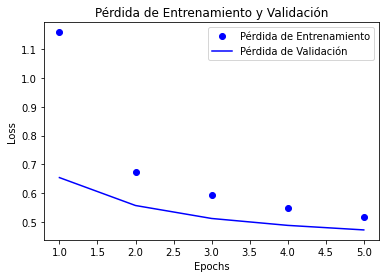

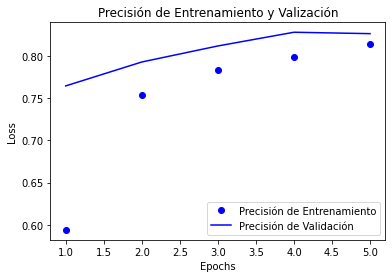

In [64]:
pinta_perdida_entrenamiento_validacion(historyD)
pinta_precision_entrenamiento_validacion(historyD)

Vemos que la precisión es del 85,40% frente al 85,20% del caso 1, muy similar aunque esta sea un 0.2% más precisa.

# CONCEPTO DE CALLBACKS

- Concepto

    Una Callback reúne varias funciones que se aplicarán en determinadas etapas de los datos de entrenamiento. Se emplean para obtener las estadísticas del modelo durante el entrenamiento. 
    Defines y usas las callbacks cuando quieres automatizar algunas tareas después de cada entrenamiento que te ayudan a controlar sobre el proceso de entrenamiento. Un ejemplo sería detener el entrenamiento cuando alcanza una cierta puntuación de precisión o de pérdida o ajustar las tasas de aprendizaje a lo largo del tiempo. Veamos algunos ejemplos: 

    - **EarlyStopping**, que para el entrenamiento si no hay cambios hacia val_loss después de las épocas que se desee y mantiene los mejores pesos una vez que se detiene el entrenamiento.

    - **ModelCheckpoint**, que guarda el modelo después de cada epoch. 

    - **LearningRateScheduler.** Ajusta la tasa de aprendizaje a lo largo del tiempo usando un horario que ya escribes de antemano. Esta función devuelve la tasa de aprendizaje deseada basada en la epoch que se marca de entrada.

    - **BaseLogger.** Callback que acumula las medias de cada época. Esta callback se aplica automáticamente a todos los modelos de Keras.


- Aplicación al modelo 1

    Veamos que ocurre si empleamos estas funciones en el modelo 1:

**EarlyStopping**

Importamos la libreria y creamos la red

In [65]:
from keras.callbacks import EarlyStopping

In [66]:
modelES = Sequential()
modelES.add(Conv2D(32, (5, 5), strides=(1, 1), activation='relu', input_shape=(28,28,1)))
modelES.add(MaxPooling2D((2, 2)))

modelES.add(Conv2D(64, (5, 5), strides=(1, 1), activation='relu'))
modelES.add(MaxPooling2D((2, 2)))

modelES.add(Flatten())
modelES.add(Dense(10, activation='softmax'))
modelES.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 1024)              0         
                                                                 
 dense_13 (Dense)            (None, 10)               

In [67]:
modelES.compile(loss=sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

Definimos que pare cuando no haya variación de pérdida durante 3 épocas

In [68]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)

In [69]:
historyES=modelES.fit(train_images, train_labels,
          batch_size=50,
          epochs=25,
          verbose=1,
          validation_split=0.2, callbacks=[callback])

Epoch 1/25
960/960 [==============================] - 4s 4ms/step - loss: 1.0324 - accuracy: 0.6368 - val_loss: 0.6616 - val_accuracy: 0.7539
Epoch 2/25
960/960 [==============================] - 3s 3ms/step - loss: 0.6188 - accuracy: 0.7768 - val_loss: 0.5719 - val_accuracy: 0.7972
Epoch 3/25
960/960 [==============================] - 3s 3ms/step - loss: 0.5314 - accuracy: 0.8104 - val_loss: 0.5630 - val_accuracy: 0.7785
Epoch 4/25
960/960 [==============================] - 3s 3ms/step - loss: 0.4830 - accuracy: 0.8289 - val_loss: 0.4889 - val_accuracy: 0.8257
Epoch 5/25
960/960 [==============================] - 3s 3ms/step - loss: 0.4488 - accuracy: 0.8419 - val_loss: 0.4613 - val_accuracy: 0.8347
Epoch 6/25
960/960 [==============================] - 3s 3ms/step - loss: 0.4267 - accuracy: 0.8488 - val_loss: 0.4346 - val_accuracy: 0.8475
Epoch 7/25
960/960 [==============================] - 3s 3ms/step - loss: 0.4078 - accuracy: 0.8556 - val_loss: 0.4575 - val_accuracy: 0.8355
Epoch 

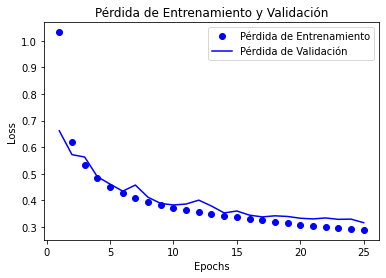

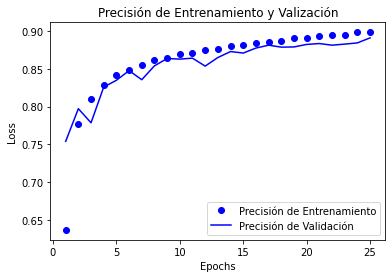

In [70]:
pinta_perdida_entrenamiento_validacion(historyES)
pinta_precision_entrenamiento_validacion(historyES)

Vemos que no se produce una parada en las épocas porque no hay ninguna época donde la pérdida se mantenga constante durante 3 seguidas. 

**ModelCheckpoint**

Importamos la libreria y creamos la red

In [71]:
from keras.callbacks import ModelCheckpoint

In [72]:
modelCP = Sequential()
modelCP.add(Conv2D(32, (5, 5), strides=(1, 1), activation='relu', input_shape=(28,28,1)))
modelCP.add(MaxPooling2D((2, 2)))

modelCP.add(Conv2D(64, (5, 5), strides=(1, 1), activation='relu'))
modelCP.add(MaxPooling2D((2, 2)))

modelCP.add(Flatten())
modelCP.add(Dense(10, activation='softmax'))
modelCP.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 1024)              0         
                                                                 
 dense_14 (Dense)            (None, 10)              

In [73]:
modelCP.compile(loss=sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

Definimos el ckeckpoint:

In [74]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [75]:
historyCP=modelCP.fit(train_images, train_labels,
          batch_size=50,
          epochs=5,
          verbose=1,
          validation_split=0.2, callbacks=[model_checkpoint_callback])

Epoch 1/5
960/960 [==============================] - 4s 4ms/step - loss: 0.9963 - accuracy: 0.6582 - val_loss: 0.6211 - val_accuracy: 0.7782
Epoch 2/5
960/960 [==============================] - 3s 3ms/step - loss: 0.5893 - accuracy: 0.7870 - val_loss: 0.5268 - val_accuracy: 0.8127
Epoch 3/5
960/960 [==============================] - 3s 3ms/step - loss: 0.5132 - accuracy: 0.8171 - val_loss: 0.4982 - val_accuracy: 0.8248
Epoch 4/5
960/960 [==============================] - 3s 3ms/step - loss: 0.4673 - accuracy: 0.8355 - val_loss: 0.4498 - val_accuracy: 0.8419
Epoch 5/5
960/960 [==============================] - 3s 3ms/step - loss: 0.4365 - accuracy: 0.8468 - val_loss: 0.4415 - val_accuracy: 0.8482


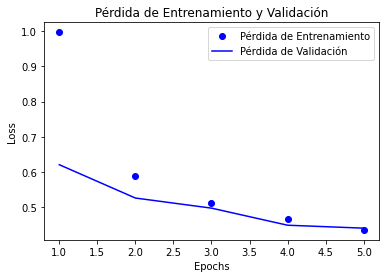

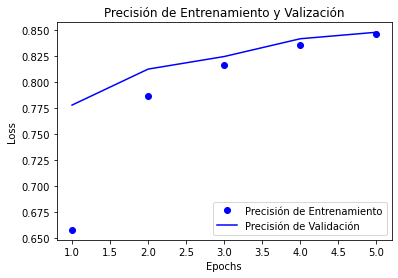

In [76]:
pinta_perdida_entrenamiento_validacion(historyCP)
pinta_precision_entrenamiento_validacion(historyCP)

**LearningRateScheduler**

Importamos la libería y realizamos los mismos pasos que con las dos anteriores: 

In [77]:
from tensorflow.keras.callbacks import LearningRateScheduler
import math

In [78]:
modelLR = Sequential()
modelLR.add(Conv2D(32, (5, 5), strides=(1, 1), activation='relu', input_shape=(28,28,1)))
modelLR.add(MaxPooling2D((2, 2)))

modelLR.add(Conv2D(64, (5, 5), strides=(1, 1), activation='relu'))
modelLR.add(MaxPooling2D((2, 2)))

modelLR.add(Flatten())
modelLR.add(Dense(10, activation='softmax'))
modelLR.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 1024)              0         
                                                                 
 dense_15 (Dense)            (None, 10)              

In [79]:
modelLR.compile(loss=sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

In [80]:
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [81]:
historyLR=modelLR.fit(train_images, train_labels,
          batch_size=50,
          epochs=5,
          verbose=1,
          validation_split=0.2, callbacks=LearningRateScheduler(step_decay))

Epoch 1/5
960/960 [==============================] - 4s 4ms/step - loss: 0.6035 - accuracy: 0.7808 - val_loss: 0.4431 - val_accuracy: 0.8391 - lr: 0.1000
Epoch 2/5
960/960 [==============================] - 3s 4ms/step - loss: 0.3835 - accuracy: 0.8619 - val_loss: 0.3646 - val_accuracy: 0.8692 - lr: 0.1000
Epoch 3/5
960/960 [==============================] - 3s 4ms/step - loss: 0.3366 - accuracy: 0.8783 - val_loss: 0.3257 - val_accuracy: 0.8817 - lr: 0.1000
Epoch 4/5
960/960 [==============================] - 3s 4ms/step - loss: 0.3075 - accuracy: 0.8898 - val_loss: 0.3132 - val_accuracy: 0.8882 - lr: 0.1000
Epoch 5/5
960/960 [==============================] - 3s 3ms/step - loss: 0.2887 - accuracy: 0.8957 - val_loss: 0.3443 - val_accuracy: 0.8777 - lr: 0.1000


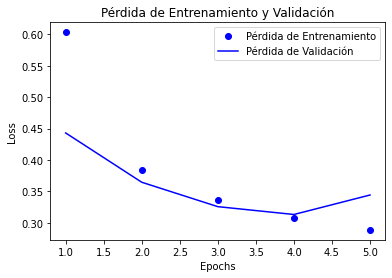

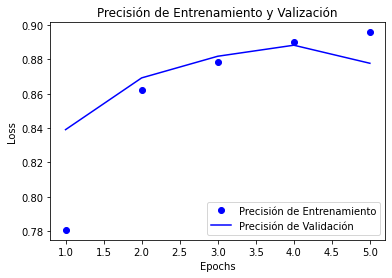

In [82]:
pinta_perdida_entrenamiento_validacion(historyLR)
pinta_precision_entrenamiento_validacion(historyLR)

# CONCLUSIONES FINALES Y COMPARACIÓN CON RESULTADOS OBTENIDOS EN LA PRÁCTICA 1

Como conclusiones finales de esta práctica se puede observar que de los 3 modelos iniciales realizados, viendo los diferentes estudios realizados de cada uno de ellos a lo largo de la práctica se puede decir claramente que el modelo 3 es el mejor con bastante diferencia. De esto podemos concluir que el número de capas densas utilizadas en una red convolucional o la función de activación de las capas convolucionales en estos 3 casos no resulta relevante.

Es el optimizador utilizado en el tercer caso el que nos permite obtener un modelo más preciso, el optimizador 'adam' es mejor que el optimizador 'sgd'.

Comparando con la práctica 1 vemos que esto también ocurría en el caso de las redes de capas densas en las cuales el uso del oprimizador Adam nos permitía crear modelos más precisos.

En cuanto a los valores de precisión y pérdida de los modelos de la práctica 1 vemos que son peores en casi todos los casos que en los modelos realizados en esta práctica, con lo que concluimos que la red convolucional es capaz de predecir mejor con estos datos de entrada.

También debemos decir que teniendo en cuenta los resultados obtenidos con la matriz de confusión de cada uno de los casos, a pesar de que las redes convolucionales son mejores que las redes de capas densas, el mayor número de errores a la hora de predecir se sigue produciendo en las imágenes con etiqueta 2, 4 y 6 correspondientes a jersey, camisas y abrigos ya que tienen una forma muy parecida.

Centrandonos más en esta práctica también hemos visto que cuando no utilizamos optimizador Adam el modelo necesita más épocas para entrenarse correctamente, mientras que en el modelo 3 en el que si utilizamos Adam, basta con emplear 5 épocas, con más el modelo se sobre entrena y se dispara la pérdida.

En cuanto a la implementación del batch_normalization en el caso 1 vemos que el modelo mejora considerablemente, pero el uso del regularizador dropout no mejora en este caso la red convolucional.